<a href="https://colab.research.google.com/github/adamGHRISS/F1_scraping_project/blob/main/F1_winners_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SCRAPPING**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_Formula_One_World_Drivers%27_Champions'

response = requests.get(url)
print(response.status_code)

soup = BeautifulSoup(response.content, 'html.parser')

200


In [ ]:
table_soup = soup.find('table', class_='wikitable sortable')

**COLLECTING DATA**

In [ ]:
colomn_names_soup = table_soup.find('tr')

In [ ]:
columns = colomn_names_soup.findAll('th')
column_names = [th.get_text(strip=True) for th in columns]
column_names

['Season',
 'Driver',
 'Age',
 'Constructor',
 'Tyres',
 'Poles',
 'Wins',
 'Podiums',
 'Fastest laps',
 'Points',
 '% Points',
 'Clinched[17]',
 '# of roundsremaining',
 'Margin',
 '% Margin']

In [ ]:
del column_names[3]
column_names.insert(3, 'Chassis')
column_names.insert(4, 'Engine')

In [ ]:
len(column_names)

16

In [ ]:
rows = table_soup.find('tbody').findAll('tr')

data = []
for row in rows:
  cells = row.findAll('td')
  row_data = [td.get_text(strip=True) for td in cells]
  data.append(row_data)


In [ ]:
len(data[2])

16

In [ ]:
for i in range(len(data) - 1):
  if len(data[i]) != 16:
    del data[i]

In [ ]:
len(data)

75

In [ ]:
len(data[0])

16

**CLEANING DATA**

In [ ]:
data[47][14] = data[47][14].split('[')[0]
data[47][14] = float(data[47][14])

In [ ]:
data[47][15] = data[47][15].split('[')[0]
data[47][15] = float(data[47][15])

In [ ]:
for i in range(0, 47):
  if data[i][0] != 4:
    data[i][0] = data[i][0].split('[')[0]
    data[i][0] = int(data[i][0])
  else:
    data[i][0] = int(data[i][0])
  l = [2,6,7,8,9,10,13,14]
  for j in l:
    data[i][j] = float(data[i][j])



In [ ]:
data[0]

[1950,
 'Giuseppe Farina[21]',
 44.0,
 'Alfa Romeo',
 'Alfa Romeo',
 'P',
 2.0,
 3.0,
 3.0,
 3.0,
 30.0,
 '83.333 (47.619)',
 'Round 7 of 7',
 0.0,
 3.0,
 '10.000']

In [ ]:
for i in data:
  if '(' in i[11]:
    i[11] = i[11].split('(')[0]
    i[11] = float(i[11])
  else:
    i[11] = float(i[11])
  i[15] = float(i[15])

In [ ]:
data[0]

[1950,
 'Giuseppe Farina[21]',
 44.0,
 'Alfa Romeo',
 'Alfa Romeo',
 'P',
 2.0,
 3.0,
 3.0,
 3.0,
 30.0,
 83.333,
 'Round 7 of 7',
 0.0,
 3.0,
 10.0]

In [ ]:
for i in data:
  i[1] = i[1].split('[')[0]

In [ ]:
data[25]

[1975,
 'Niki Lauda',
 26.0,
 'Ferrari',
 'Ferrari',
 'G',
 9.0,
 5.0,
 8.0,
 2.0,
 64.5,
 59.722,
 'Round 13 of 14',
 1.0,
 19.5,
 30.233]

**PANDAS DATAFRAME**

In [ ]:
df_f1_winners = pd.DataFrame(data, columns=column_names)

In [ ]:
df_f1_winners.head()

,Season,Driver,Age,Chassis,Engine,Tyres,Poles,Wins,Podiums,Fastest laps,Points,% Points,Clinched[17],# of roundsremaining,Margin,% Margin
0,1950,Giuseppe Farina,44.0,Alfa Romeo,Alfa Romeo,P,2.0,3.0,3.0,3.0,30.0,83.333,Round 7 of 7,0.0,3.0,10.000
1,1951,Juan Manuel Fangio,40.0,Alfa Romeo,Alfa Romeo,P,4.0,3.0,5.0,5.0,31.0,86.111,Round 8 of 8,0.0,6.0,19.355
2,1952,Alberto Ascari,34.0,Ferrari,Ferrari,FP,5.0,6.0,6.0,6.0,36.0,100.000,Round 6 of 8,2.0,12.0,33.333
3,1953,Alberto Ascari,35.0,Ferrari,Ferrari,P,6.0,5.0,5.0,4.0,34.5,95.833,Round 8 of 9,1.0,6.5,18.841
4,1954,Juan Manuel Fangio,43.0,Maserati[b],Maserati,P,5.0,6.0,7.0,3.0,42.0,93.333,Round 7 of 9,2.0,16.857,40.136


In [ ]:
df_f1_winners.loc[df_f1_winners['Chassis']=='Maserati[b]', 'Chassis'] = 'Maserati'

**VESUALISATION TIME 📊**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

In [ ]:
blue_colormap = ListedColormap(["#a6cee3", "#1f78b4", "#084081", "#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081", "#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081", "#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081","#a6cee3", "#1f78b4", "#084081"])

In [ ]:
num_bars = len(data)
colors = cm.get_cmap(blue_colormap, num_bars)(range(num_bars))

<ipython-input-231-36fa8564e26e>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(blue_colormap, num_bars)(range(num_bars))


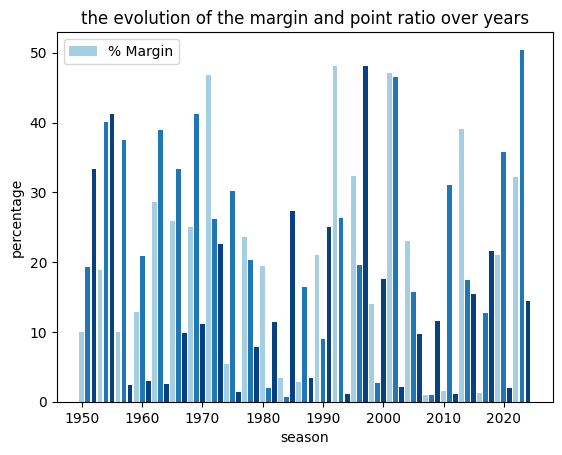

In [ ]:
# Convert 'Season' column to numeric, handling potential errors
df_f1_winners['Season'] = pd.to_numeric(df_f1_winners['Season'], errors='coerce')

#the evolution of % margin and %points over years:
plt.bar(df_f1_winners['Season'], df_f1_winners['% Margin'], label='% Margin', color=colors)

#plt.plot(df_f1_winners['Season'], df_f1_winners['% Margin'], marker='s', color='r', linestyle='-', linewidth=2, markersize=6, label='% points')

plt.title('the evolution of the margin and point ratio over years')
plt.xlabel('season')
plt.ylabel('percentage')
plt.grid(False)
plt.legend()
plt.show()

In [ ]:
constructors = df_f1_winners['Chassis'].value_counts(ascending=True)

In [ ]:
constructors

,count
Chassis,
BRM,1
Matra,1
Brawn,1
Alfa Romeo,2
Maserati,2
Cooper,2
Tyrrell,2
Benetton,2
Renault,2


In [ ]:
num_bars = len(constructors)
colors = cm.get_cmap('YlGnBu', num_bars)(range(num_bars))

<ipython-input-219-01c819dc2a1b>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('YlGnBu', num_bars)(range(num_bars))


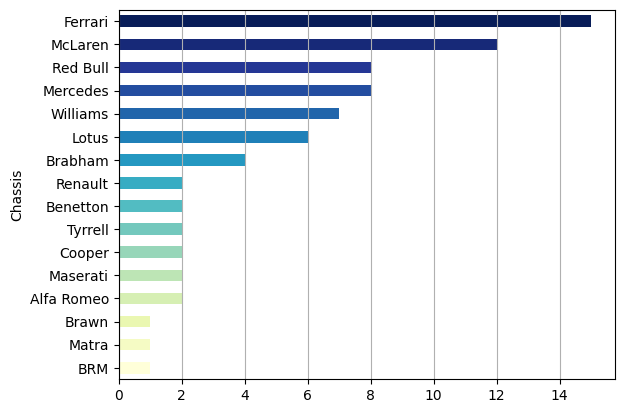

In [ ]:
constructors.plot(kind='barh',color=colors)
plt.grid(axis='x')

In [ ]:
wins_count = df_f1_winners.groupby(['Chassis', 'Driver']).size().reset_index(name='Wins')

In [ ]:
wins_count.head()

,Chassis,Driver,Wins
0,Alfa Romeo,Giuseppe Farina,1
1,Alfa Romeo,Juan Manuel Fangio,1
2,BRM,Graham Hill,1
3,Benetton,Michael Schumacher,2
4,Brabham,Denny Hulme,1


In [ ]:
wins_conts[wins_conts['Chassis']=='Red Bull']

,Chassis,Driver,Wins
35,Red Bull,Max Verstappen[56],2
36,Red Bull,Max Verstappen[57],1
37,Red Bull,Max Verstappen[58],1
38,Red Bull,Sebastian Vettel[54],4


In [ ]:
pivot_wins = wins_count.pivot_table(index='Chassis', columns='Driver', values='Wins').fillna(0)

In [ ]:
pivot_wins

Driver,Alain Prost,Alan Jones,Alberto Ascari,Ayrton Senna,Damon Hill,Denny Hulme,Emerson Fittipaldi,Fernando Alonso,Giuseppe Farina,Graham Hill,...,Max Verstappen,Michael Schumacher,Mika Häkkinen,Mike Hawthorn,Nelson Piquet,Nico Rosberg,Nigel Mansell,Niki Lauda,Phil Hill,Sebastian Vettel
Chassis,,,,,,,,,,,,,,,,,,,,,
Alfa Romeo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Benetton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brabham,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Brawn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cooper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ferrari,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
Lotus,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maserati,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


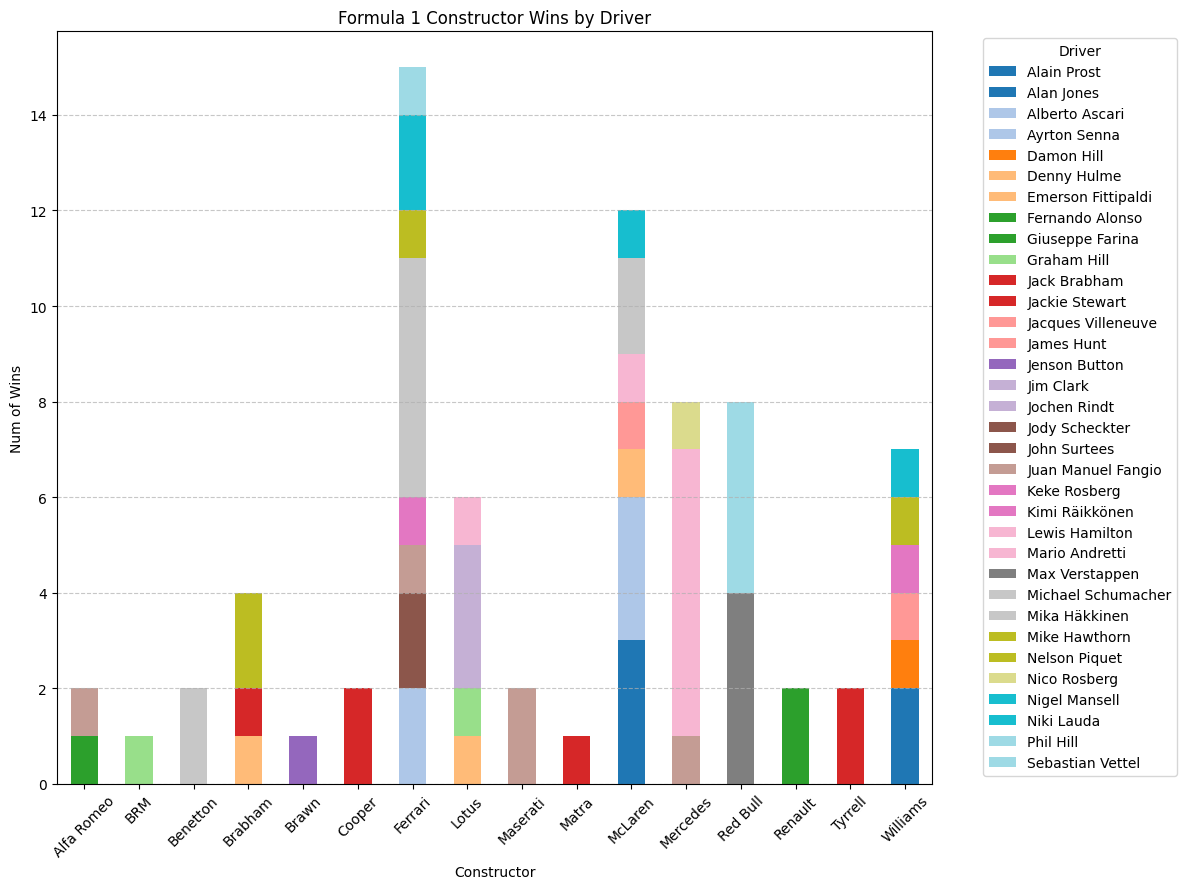

In [ ]:
pivot_wins.plot(kind='bar', stacked=True,figsize=(12, 9), colormap='tab20')

plt.title('Formula 1 Constructor Wins by Driver')
plt.xlabel('Constructor')
plt.ylabel('Num of Wins')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


In [ ]:
pivot_wins.columns

Index(['Alain Prost', 'Alan Jones', 'Alberto Ascari', 'Ayrton Senna',
       'Damon Hill', 'Denny Hulme', 'Emerson Fittipaldi', 'Fernando Alonso',
       'Giuseppe Farina', 'Graham Hill', 'Jack Brabham', 'Jackie Stewart',
       'Jacques Villeneuve', 'James Hunt', 'Jenson Button', 'Jim Clark',
       'Jochen Rindt', 'Jody Scheckter', 'John Surtees', 'Juan Manuel Fangio',
       'Keke Rosberg', 'Kimi Räikkönen', 'Lewis Hamilton', 'Mario Andretti',
       'Max Verstappen', 'Michael Schumacher', 'Mika Häkkinen',
       'Mike Hawthorn', 'Nelson Piquet', 'Nico Rosberg', 'Nigel Mansell',
       'Niki Lauda', 'Phil Hill', 'Sebastian Vettel'],
      dtype='object', name='Driver')

In [ ]:
wins_driver = wins_conts.pivot_table(index='Driver', columns='Chassis', values='Wins').fillna(0)

In [ ]:
wins_driver.head()

Chassis,Alfa Romeo,BRM,Benetton,Brabham,Brawn,Cooper,Ferrari,Lotus,Maserati,Matra,McLaren,Mercedes,Red Bull,Renault,Tyrrell,Williams
Driver,,,,,,,,,,,,,,,,
Alain Prost[42],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
Alan Jones[39],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Alberto Ascari[24],0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ayrton Senna[43],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Damon Hill[46],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


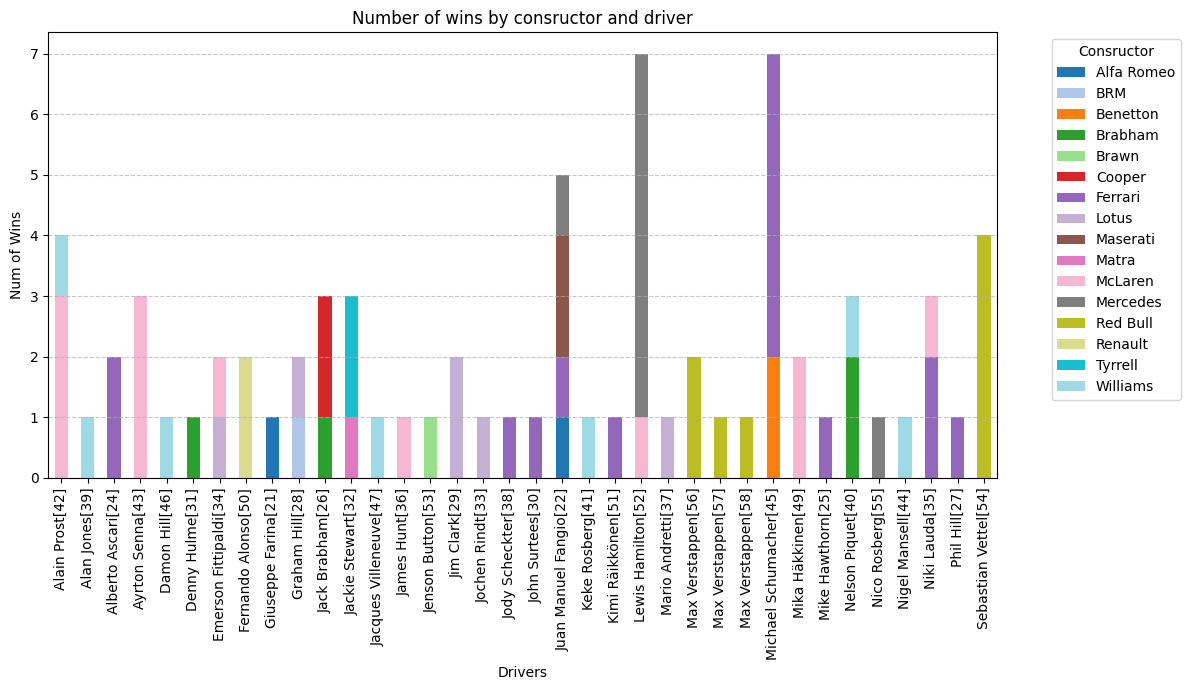

In [ ]:
wins_driver.plot(kind='bar', stacked=True,figsize=(12, 7), colormap='tab20')

plt.title('Number of wins by consructor and driver')
plt.xlabel('Drivers')
plt.ylabel('Num of Wins')

plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Consructor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

In [ ]:
type(annotations)

pandas.core.frame.DataFrame

In [ ]:
heatmap_pivot_wins = pivot_wins.copy()

heatmap_pivot_wins['total'] = heatmap_pivot_wins.sum(axis=1)
heatmap_pivot_wins.loc['total'] = heatmap_pivot_wins.sum(axis=0)

In [ ]:
heatmap_pivot_wins.head(3)

Driver,Alain Prost,Alan Jones,Alberto Ascari,Ayrton Senna,Damon Hill,Denny Hulme,Emerson Fittipaldi,Fernando Alonso,Giuseppe Farina,Graham Hill,...,Michael Schumacher,Mika Häkkinen,Mike Hawthorn,Nelson Piquet,Nico Rosberg,Nigel Mansell,Niki Lauda,Phil Hill,Sebastian Vettel,total
Chassis,,,,,,,,,,,,,,,,,,,,,
Alfa Romeo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
BRM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Benetton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
annotations = heatmap_pivot_wins.applymap(lambda x: f"{int(x)}" if x != 0 else "")

<ipython-input-197-e24fd0890904>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = heatmap_pivot_wins.applymap(lambda x: f"{int(x)}" if x != 0 else "")


In [ ]:
custom_colors = ['#f1f8ff', '#bedaf7', '#7ab3ef', '#368ce7', '#1666ba']
custom_cmap = LinearSegmentedColormap.from_list("CustomPalette", custom_colors)

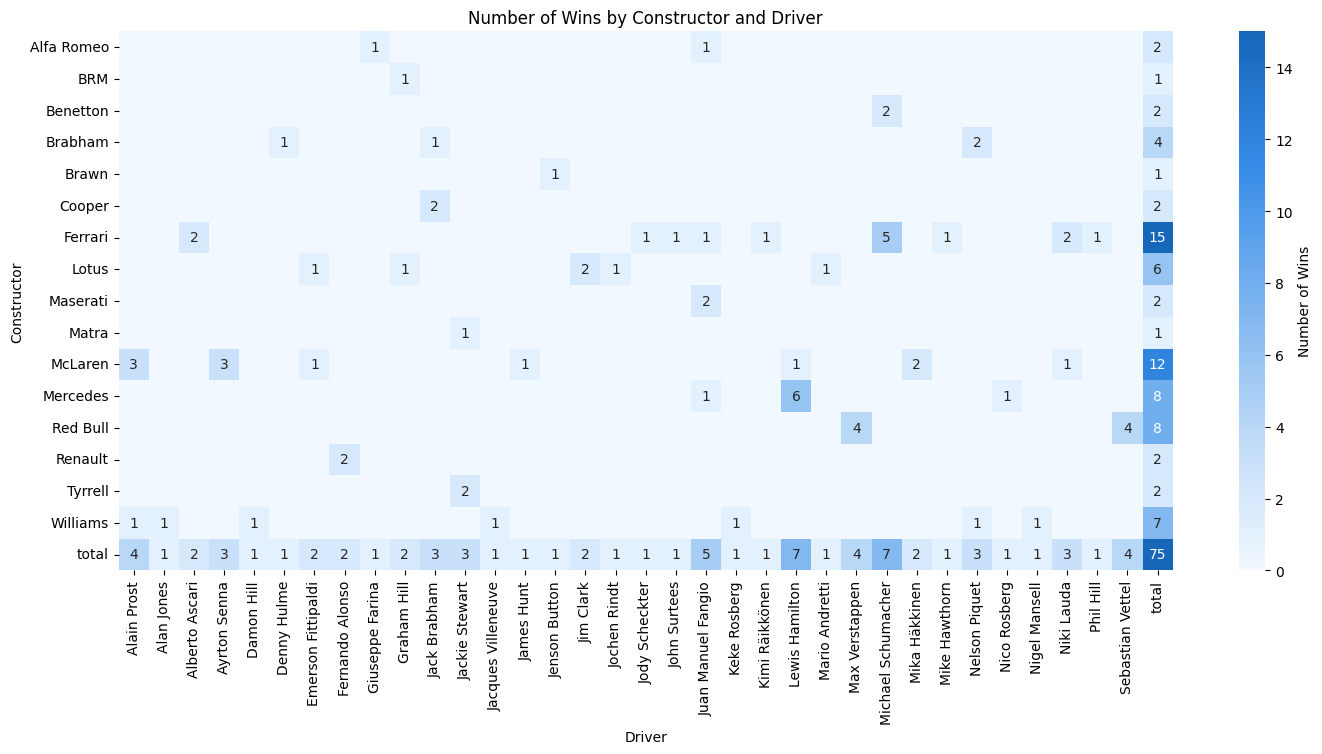

In [ ]:
plt.figure(figsize=(17, 7))
sns.heatmap(heatmap_pivot_wins, annot=annotations, fmt="", cmap=custom_cmap, cbar_kws={'label': 'Number of Wins'}, vmin=0, vmax=15)
plt.title('Number of Wins by Constructor and Driver')
plt.xlabel('Driver')
plt.ylabel('Constructor')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()